In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
voy1 = pd.read_csv('voy1_results.csv')
voy2 = pd.read_csv('voy2_results.csv')
pio10 = pd.read_csv('pio10_results.csv')
pio11 = pd.read_csv('pio11_results.csv')
nh = pd.read_csv('nh_results.csv')

In [3]:
voy1['spacecraft'] = 'Voyager 1'
voy2['spacecraft'] = 'Voyager 2'
pio10['spacecraft'] = 'Pioneer 10'
pio11['spacecraft'] = 'Pioneer 11'
nh['spacecraft'] = 'New Horizons'

In [4]:
combined_total = pd.concat([voy1, voy2, pio10, pio11, nh])

combined_total.insert(0, 'spacecraft', combined_total.pop('spacecraft'))
combined_total = combined_total.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1'], axis = 1)
combined_total = combined_total.sort_values(by=['return_year'])

print(combined_total)

       spacecraft            source_id          ra        dec      g_abs  \
0      Pioneer 10  2611561706216413696  343.483564  -6.784830  15.764734   
1       Voyager 2  6306068659857135232  226.947946 -16.465125  18.602391   
0       Voyager 2  3698534434669937024  183.564726   0.622727  12.289536   
0      Pioneer 11   640862653425455360  145.260767  22.022373  12.242592   
2       Voyager 2   117709729140217216   52.207648  26.486169  11.206701   
..            ...                  ...         ...        ...        ...   
137  New Horizons  4082923283128273536  288.676648 -20.430842  12.202941   
271     Voyager 2  6447860717304597888  299.773897 -57.120159  10.004920   
136  New Horizons  4070351883838806400  269.166784 -21.998288   7.002345   
276     Voyager 1  4540571878383788672  259.182485  12.118915   5.153546   
138  New Horizons  4082316116509482752  285.950607 -20.730154   5.320351   

        bp_rp    parallax  parallax_error       dist  \
0    1.420248  117.138840      

In [20]:
num = np.arange(0, 1296)
combined_total['index'] = num

print(combined_total.columns)

Index(['spacecraft', 'source_id', 'ra', 'dec', 'g_abs', 'bp_rp', 'parallax',
       'parallax_error', 'dist', 'date', 'pmra', 'pmdec', 'adv_ra', 'adv_dec',
       'eph_pt', 'time_total', 'num', 'num_hit', 'reach_time_years',
       'reach_time_days', 'year', 'reach_year', 'return_year', 'index',
       'num2'],
      dtype='object')


In [21]:
new_combined_total = pd.DataFrame(columns = ['spacecraft', 'source_id', 'ra', 'dec', 'g_abs', 'bp_rp', 'parallax', 'parallax_error', 'dist', 'date', 'pmra', 'pmdec', 'adv_ra', 'adv_dec', 'eph_pt', 'time_total', 'num', 'num_hit', 'reach_time_years', 'reach_time_days', 'year', 'reach_year', 'return_year', 'index', 'num2'])
print(new_combined_total)

Empty DataFrame
Columns: [spacecraft, source_id, ra, dec, g_abs, bp_rp, parallax, parallax_error, dist, date, pmra, pmdec, adv_ra, adv_dec, eph_pt, time_total, num, num_hit, reach_time_years, reach_time_days, year, reach_year, return_year, index, num2]
Index: []

[0 rows x 25 columns]


In [31]:
print(new_combined_total[['source_id']].to_numpy())
print(combined_total[combined_total['index'] == 0]['source_id'][0])

[]
2611561706216413696


In [34]:
#Remove duplicates and add together time total of duplicates

total_times = np.array([])     #array of total times for each star, index matches

for i in range(len(combined_total.index)):
    if (combined_total[combined_total['index'] == i]['source_id'][0] not in new_combined_total[['source_id']].to_numpy()):   #if star not in unique database
        new_combined_total = new_combined_total.append(combined_total.loc[combined_total['index'] == i]) #add star to unique df
        
        total_time = combined_total[combined_total['index'] == i]['time_total'][0]   #add value to total time
        
        for j in range(i+1, len(combined_total.index)):   #search from next star in to end
            
            if combined_total[combined_total['index'] == j]['source_id'][0] == combined_total[combined_total['index'] == i]['source_id'][0]:    #if same star appears again add time and increase number of hits by 1
                total_time += combined_total[combined_total['index'] == j]['time_total'][0]
                
        total_times = np.append(total_times, total_time)    #add total time to total times array

new_combined_total['time_total'] = total_times.tolist()    #add total times and num hit as columns
print(new_combined_total)  #dataframe of stars without duplicates and with total times & num hits

KeyError: 0

In [36]:
combined_total = pd.concat([voy1[:5], voy2[:5], pio10[:5], pio11[:5], nh[:5], voy2[5:6]])
combined_total.insert(0, 'spacecraft', combined_total.pop('spacecraft'))
combined_total = combined_total.drop(['Unnamed: 0.1.1.1', 'Unnamed: 0.1.1', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1'], axis = 1)
combined_total = combined_total.sort_values(by=['return_year'])
combined_total = combined_total.drop_duplicates(subset=['source_id'])

print(combined_total)
combined_total.to_csv('combined_stars_cropped.csv')


     spacecraft            source_id          ra        dec      g_abs  \
0    Pioneer 10  2611561706216413696  343.483564  -6.784830  15.764734   
1     Voyager 2  6306068659857135232  226.947946 -16.465125  18.602391   
0     Voyager 2  3698534434669937024  183.564726   0.622727  12.289536   
0    Pioneer 11   640862653425455360  145.260767  22.022373  12.242592   
2     Voyager 2   117709729140217216   52.207648  26.486169  11.206701   
0     Voyager 1  3814369840081992448  170.406975   6.133523  10.952995   
4     Voyager 2  3429699684156117760   90.977243  26.146118  10.821683   
2    Pioneer 10   148133112801536000   69.953602  25.157047  10.854072   
1    Pioneer 11   129200553364168064   42.956808  29.486212  11.273611   
2     Voyager 1  4540984195244025088  257.468171  11.925768  11.299846   
5     Voyager 2   663767443044739840  127.051528  20.136505  10.169940   
1    Pioneer 10  6233452028580863744  236.874676 -27.919921  10.172965   
3    Pioneer 10  4110228589254067328  

In [38]:
print(combined_total['source_id'])

0    2611561706216413696
1    6306068659857135232
0    3698534434669937024
0     640862653425455360
2     117709729140217216
0    3814369840081992448
4    3429699684156117760
2     148133112801536000
1     129200553364168064
2    4540984195244025088
5     663767443044739840
1    6233452028580863744
3    4110228589254067328
1     865699110037321600
4      84210874016975360
3    3367558512468755968
4    1174143182830505984
2    3691265460219482240
3     100380639907919872
4    2631967439437024384
0    3618803417701443072
1    4117657650084825472
2    3635672468691948672
3    4127569403769839488
4    4084898525733384832
Name: source_id, dtype: int64


In [39]:
#Doing same as above but for lists that include error

In [40]:
voy1e = pd.read_csv('voy1_results_error.csv')
voy2e = pd.read_csv('voy2_results_error.csv')
pio10e = pd.read_csv('pio10_results_error.csv')
pio11e = pd.read_csv('pio11_results_error.csv')
nhe = pd.read_csv('nh_results_error.csv')

In [41]:
voy1e['spacecraft'] = 'Voyager 1'
voy2e['spacecraft'] = 'Voyager 2'
pio10e['spacecraft'] = 'Pioneer 10'
pio11e['spacecraft'] = 'Pioneer 11'
nhe['spacecraft'] = 'New Horizons'

In [42]:
combined_total = pd.concat([voy1e, voy2e, pio10e, pio11e, nhe])
combined_total.insert(0, 'spacecraft', combined_total.pop('spacecraft'))
combined_total = combined_total.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis = 1)
combined_total = combined_total.sort_values(by=['return_year'])

print(combined_total)
combined_total.to_csv('combined_stars_error.csv')

       spacecraft            source_id          ra        dec      g_abs  \
0      Pioneer 10  2611561706216413696  343.483564  -6.784830  15.764734   
1       Voyager 2  6306068659857135232  226.947946 -16.465125  18.602391   
0       Voyager 2  3698534434669937024  183.564726   0.622727  12.289536   
2       Voyager 2   664214600677732864  126.329313  21.262974  20.253212   
0      Pioneer 11   640862653425455360  145.260767  22.022373  12.242592   
..            ...                  ...         ...        ...        ...   
146  New Horizons  4082923283128273536  288.676648 -20.430842  12.202941   
297     Voyager 2  6447860717304597888  299.773897 -57.120159  10.004920   
145  New Horizons  4070351883838806400  269.166784 -21.998288   7.002345   
297     Voyager 1  4540571878383788672  259.182485  12.118915   5.153546   
147  New Horizons  4082316116509482752  285.950607 -20.730154   5.320351   

        bp_rp    parallax  parallax_error       dist  \
0    1.420248  117.138840      

In [43]:
combined_total = combined_total.drop_duplicates(subset=['source_id'])

print(combined_total)

combined_total.to_csv('combined_stars_error.csv')

       spacecraft            source_id          ra        dec      g_abs  \
0      Pioneer 10  2611561706216413696  343.483564  -6.784830  15.764734   
1       Voyager 2  6306068659857135232  226.947946 -16.465125  18.602391   
0       Voyager 2  3698534434669937024  183.564726   0.622727  12.289536   
2       Voyager 2   664214600677732864  126.329313  21.262974  20.253212   
0      Pioneer 11   640862653425455360  145.260767  22.022373  12.242592   
..            ...                  ...         ...        ...        ...   
146  New Horizons  4082923283128273536  288.676648 -20.430842  12.202941   
297     Voyager 2  6447860717304597888  299.773897 -57.120159  10.004920   
145  New Horizons  4070351883838806400  269.166784 -21.998288   7.002345   
297     Voyager 1  4540571878383788672  259.182485  12.118915   5.153546   
147  New Horizons  4082316116509482752  285.950607 -20.730154   5.320351   

        bp_rp    parallax  parallax_error       dist  \
0    1.420248  117.138840      

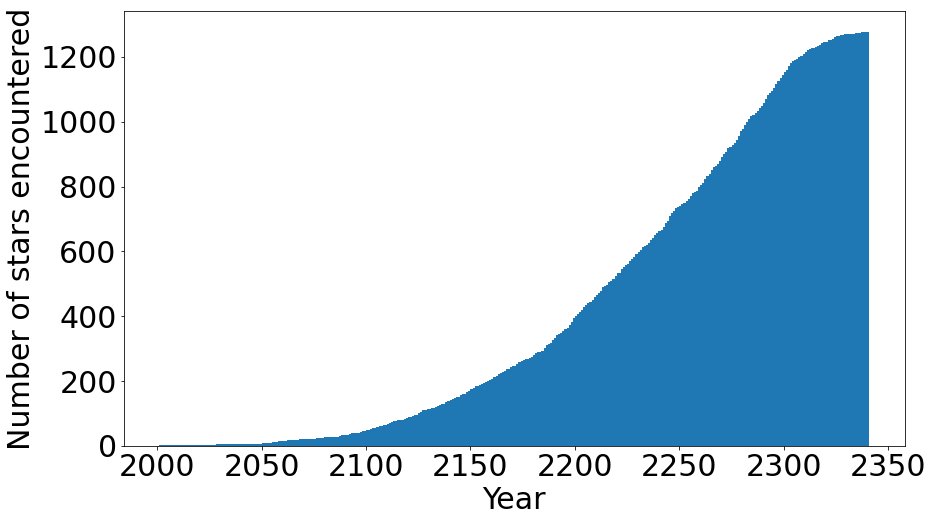

In [45]:
years = np.arange(2001, 2342)   #graph of total stars reached vs year

stars = pd.read_csv('combined_stars.csv') #distance histogram

plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(14, 8))

plt.hist(stars['reach_year'], bins = years, cumulative = True) #plot parallax (mas) converted to distance (pc) in histogram

plt.xlabel("Year")
plt.ylabel("Number of stars encountered")
#plt.figtext(0.24, 0.8, "Voyager 1", wrap=True, horizontalalignment='center')

#plt.ylim(0, 120)

plt.savefig("reached_time.png")
plt.show()

In [24]:
combined_total = combined_total.sort_values(by=['dist'], ascending = False)
print("Farthest star")
print(combined_total.iloc[0])

Farthest star
spacecraft                      New Horizons
source_id                4070351883838806400
ra                                   269.167
dec                                 -21.9983
g_abs                                7.00234
bp_rp                                 2.2931
parallax                             10.0023
parallax_error                     0.0485259
dist                                 99.9769
date                2008-Dec-09 15:52:15.639
reach_time_years                     325.925
reach_time_days                       119041
year                                    2008
reach_year                           2333.92
return_year                          2659.85
Name: 139, dtype: object


In [50]:
from astroquery.gaia import Gaia
import numpy as np

combined_pm = pd.DataFrame(columns = ['source_id', 'pmra', 'pmdec', 'dist'])

source_ids = combined_total['source_id'].to_numpy()

for i in range(len(combined_total.index)):
    query = """SELECT source_id, pmra, pmdec, 1000/parallax AS dist
        FROM external.gaiaedr3_gcns_main_1
        WHERE source_id = """ + str(source_ids[i])
    
    results = Gaia.launch_job_async(query).get_results()
    combined_pm = pd.concat([combined_pm, results.to_pandas()], ignore_index = True)
    
    
print(results)

INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
     source_id         pmra      pmdec           dist      
                     mas / yr   mas / yr                   
------------------- ---------- ---------- -----------------
6306068659857135232 -151.79462 -896.01215 7.410294515561155


In [52]:
combined_pm['pmra'] = abs(combined_pm['pmra'])

combined_pm = combined_pm.sort_values(by=['pmra'], ascending = False)
print("Greatest PMRA")
print(combined_pm.iloc[0])

Greatest PMRA
source_id    2611561706216413696
pmra                      2485.8
pmdec                   -681.254
dist                     8.53688
Name: 1405, dtype: object


In [53]:
combined_pm = combined_pm.sort_values(by=['pmdec'], ascending = False)
print("Greatest PMDEC")
print(combined_pm.iloc[0])

Greatest PMDEC
source_id    640343619123188224
pmra                    132.829
pmdec                   191.641
dist                    44.4638
Name: 1276, dtype: object


In [54]:
combined_pm = combined_pm.sort_values(by=['pmdec'], ascending = True)
print("Least PMDEC")
print(combined_pm.iloc[0])

Least PMDEC
source_id    2631967439437024384
pmra                     605.808
pmdec                   -1589.95
dist                     36.2985
Name: 1355, dtype: object


In [56]:
query = """SELECT source_id, pmra, pmdec, 1000/parallax AS dist
        FROM external.gaiaedr3_gcns_main_1
        WHERE source_id = """ + str(4070351883838806400)
    
results = Gaia.launch_job_async(query).get_results()
print(results)

INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
     source_id         pmra     pmdec          dist      
                     mas / yr  mas / yr                  
------------------- --------- --------- -----------------
4070351883838806400 -7.516939 -40.17323 99.97690734199692


In [59]:
dist_move_ra = 3.26*99.9769*-7.516939/1000
dist_move_dec = 3.26*99.9769*-40.17323/1000

print("Farthest star difference ra: " + str(dist_move_ra))
print("Farthest star difference dec: " + str(dist_move_dec))

Farthest star difference ra: -2.449956043391666
Farthest star difference dec: -13.093447694741618


In [61]:
pmra_move_ra = 3.26*8.53688*2485.8/1000
pmra_move_dec = 3.26*8.53688*-681.254/1000

print("Fastest pmra star difference ra: " + str(pmra_move_ra))
print("Fastest pmra star difference dec: " + str(pmra_move_dec))

Fastest pmra star difference ra: 69.18038275104
Fastest pmra star difference dec: -18.959454690915198


In [62]:
pmdec_move_ra = 3.26*36.2985*605.808/1000
pmdec_move_dec = 3.26*36.2985*-1589.95/1000

print("Fastest pmdec star difference ra: " + str(pmdec_move_ra))
print("Fastest pmdec star difference dec: " + str(pmdec_move_dec))

Fastest pmdec star difference ra: 71.68714470287999
Fastest pmdec star difference dec: -188.14372824449998


In [66]:
combined_pm['diff_ra'] = 3.26*combined_pm['dist']*abs(combined_pm['pmra'])/1000
combined_pm['diff_dec'] = 3.26*combined_pm['dist']*abs(combined_pm['pmdec'])/1000
print(combined_pm.loc[1355])

source_id    2631967439437024384
pmra                     605.808
pmdec                   -1589.95
dist                     36.2985
diff_ra                  71.6872
diff_dec                 188.144
Name: 1355, dtype: object


In [67]:
combined_pm = combined_pm.sort_values(by=['diff_dec'], ascending = False)
print("Greatest difference dec")
print(combined_pm.iloc[0])

Greatest difference dec
source_id    2631967439437024384
pmra                     605.808
pmdec                   -1589.95
dist                     36.2985
diff_ra                  71.6872
diff_dec                 188.144
Name: 1355, dtype: object


In [68]:
combined_pm = combined_pm.sort_values(by=['diff_ra'], ascending = False)
print("Greatest difference ra")
print(combined_pm.iloc[0])

Greatest difference ra
source_id    4115484808910638208
pmra                     347.216
pmdec                   -349.347
dist                     92.9924
diff_ra                   105.26
diff_dec                 105.907
Name: 266, dtype: object
